In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = '/Users/siriduggineni/Downloads/archive (9)/'
train_path = os.path.join(dataset_path, 'training')
test_path = os.path.join(dataset_path, 'testing')

train_images = []
train_labels = []
for folder_name in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder_name)
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        train_images.append(image_path)
        train_labels.append(folder_name)

test_images = []
test_labels = []
for folder_name in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder_name)
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        test_images.append(image_path)
        test_labels.append(folder_name)


all_images = train_images + test_images
all_labels = train_labels + test_labels


combined_data = list(zip(all_images, all_labels))
np.random.shuffle(combined_data)
all_images, all_labels = zip(*combined_data)

train_images, val_test_images, train_labels, val_test_labels = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(val_test_images, val_test_labels, test_size=0.5, random_state=42)


Sample images from the training set:


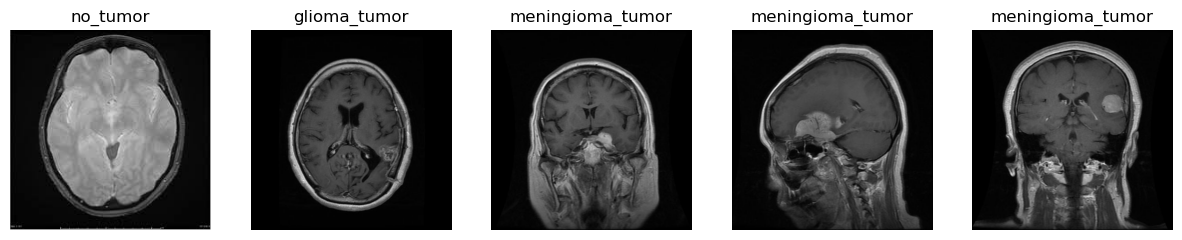

Sample images from the validation set:


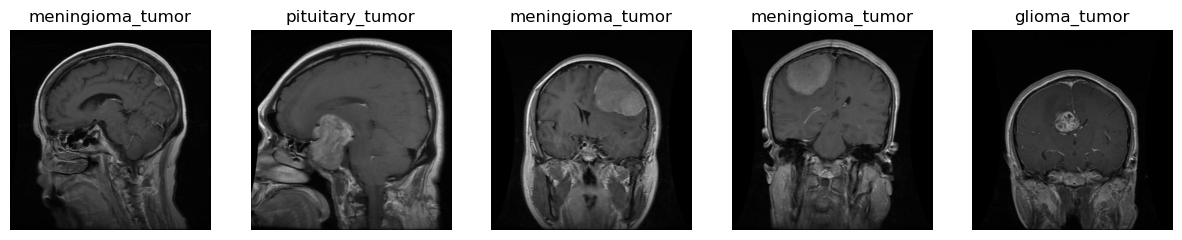

Sample images from the test set:


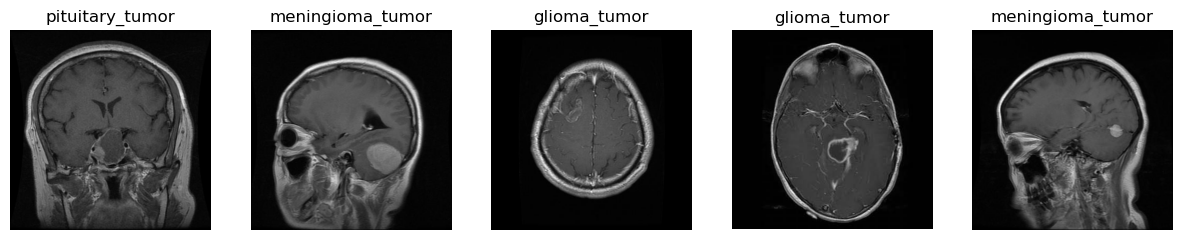

In [2]:
import cv2
import matplotlib.pyplot as plt


def display_sample_images(image_paths, labels, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        image = cv2.imread(image_paths[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        axes[i].imshow(image)
        axes[i].set_title(labels[i])
        axes[i].axis('off')
    plt.show()


print("Sample images from the training set:")
display_sample_images(train_images, train_labels)

print("Sample images from the validation set:")
display_sample_images(val_images, val_labels)

print("Sample images from the test set:")
display_sample_images(test_images, test_labels)


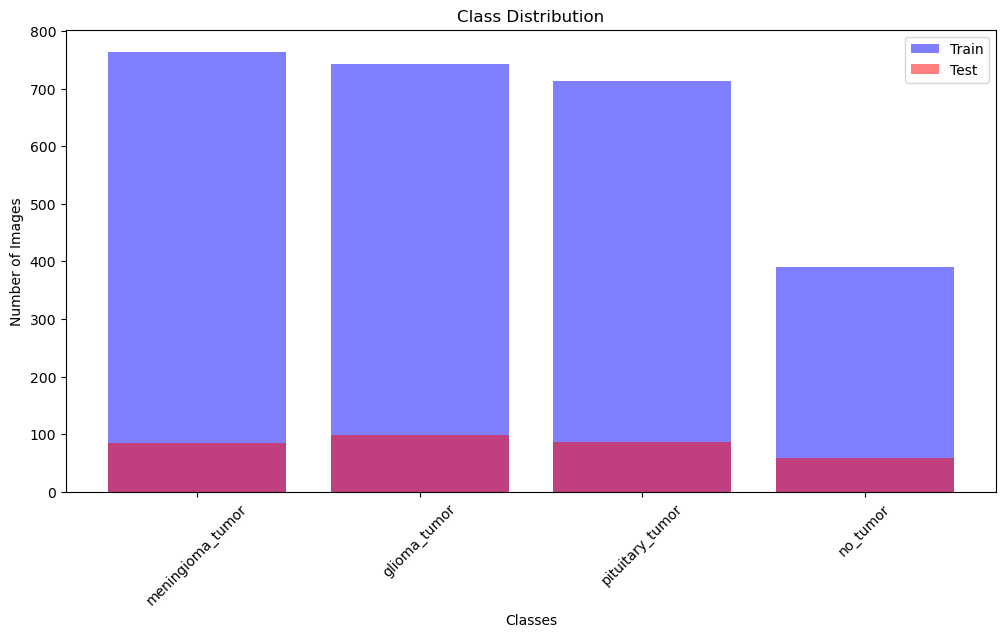

In [3]:
import matplotlib.pyplot as plt

class_counts_train = {label: train_labels.count(label) for label in set(train_labels)}
class_counts_test = {label: test_labels.count(label) for label in set(test_labels)}

plt.figure(figsize=(12, 6))
plt.bar(class_counts_train.keys(), class_counts_train.values(), alpha=0.5, color='blue', label='Train')
plt.bar(class_counts_test.keys(), class_counts_test.values(), alpha=0.5, color='red', label='Test')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

train_images, val_test_images, train_labels, val_test_labels = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(val_test_images, val_test_labels, test_size=0.5, random_state=42)

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)
test_labels_encoded = label_encoder.transform(test_labels)

y_train = to_categorical(train_labels_encoded)
y_val = to_categorical(val_labels_encoded)
y_test = to_categorical(test_labels_encoded)
img_width = 150
img_height = 150
def load_images(image_paths):
    images = []
    for image_path in image_paths:
        image = cv2.imread(image_path)
        image = cv2.resize(image, (img_width, img_height))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
    return np.array(images)

train_images_array = load_images(train_images)
val_images_array = load_images(val_images)
test_images_array = load_images(test_images)

X_train = train_images_array / 255.0
X_val = val_images_array / 255.0
X_test = test_images_array / 255.0


In [6]:
pip install keras-resnet


  Preparing metadata (setup.py) ... done
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20461 sha256=72abb8c698f6a6f7adb62cdcf7c89acbf524aa847e7cff8eb1fbf94a60c9ad6a
  Stored in directory: /Users/siriduggineni/Library/Caches/pip/wheels/41/e7/70/126fc8672253456753411e23c230d50c415f2fd6683b195869
Successfully built keras-resnet
Note: you may need to restart the kernel to use updated packages.


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Resizing
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

# Define input shape
input_shape = (150, 150, 3)

# Load pre-trained ResNet50 model
pretrained_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze pre-trained layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Add custom classifier layers on top of ResNet50
model = Sequential()
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 256)               13107456  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 36696196 (139.98 MB)
Trainable params: 13108484 (50.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
batch_size = 64
checkpoint = ModelCheckpoint('DL_best_model_Resnet_pretrained.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/20
41/41 [==============================] - ETA: 0s - loss: 2.4138 - accuracy: 0.3489
Epoch 1: val_accuracy improved from -inf to 0.49693, saving model to DL_best_model_Resnet_pretrained.h5


/Applications/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 42s 1s/step - loss: 2.4138 - accuracy: 0.3489 - val_loss: 1.2410 - val_accuracy: 0.4969
Epoch 2/20
41/41 [==============================] - ETA: 0s - loss: 1.2177 - accuracy: 0.4259
Epoch 2: val_accuracy did not improve from 0.49693
41/41 [==============================] - 41s 1s/step - loss: 1.2177 - accuracy: 0.4259 - val_loss: 1.1594 - val_accuracy: 0.4816
Epoch 3/20
41/41 [==============================] - ETA: 0s - loss: 1.1511 - accuracy: 0.4784
Epoch 3: val_accuracy improved from 0.49693 to 0.56442, saving model to DL_best_model_Resnet_pretrained.h5
41/41 [==============================] - 42s 1s/step - loss: 1.1511 - accuracy: 0.4784 - val_loss: 1.0883 - val_accuracy: 0.5644
Epoch 4/20
41/41 [==============================] - ETA: 0s - loss: 1.0948 - accuracy: 0.5247
Epoch 4: val_accuracy improved from 0.56442 to 0.59816, saving model to DL_best_model_Resnet_pretrained.h5
41/41 [==============================] - 40s 976ms/step - loss: 1.

In [11]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/20
41/41 [==============================] - ETA: 0s - loss: 0.8783 - accuracy: 0.5975
Epoch 1: val_accuracy did not improve from 0.72086
41/41 [==============================] - 40s 984ms/step - loss: 0.8783 - accuracy: 0.5975 - val_loss: 0.7671 - val_accuracy: 0.7025
Epoch 2/20
41/41 [==============================] - ETA: 0s - loss: 0.8686 - accuracy: 0.6166
Epoch 2: val_accuracy improved from 0.72086 to 0.73926, saving model to DL_best_model_Resnet_pretrained.h5
41/41 [==============================] - 40s 970ms/step - loss: 0.8686 - accuracy: 0.6166 - val_loss: 0.7823 - val_accuracy: 0.7393
Epoch 3/20
41/41 [==============================] - ETA: 0s - loss: 0.8896 - accuracy: 0.5967
Epoch 3: val_accuracy did not improve from 0.73926
41/41 [==============================] - 41s 1s/step - loss: 0.8896 - accuracy: 0.5967 - val_loss: 0.8995 - val_accuracy: 0.6779
Epoch 4/20
41/41 [==============================] - ETA: 0s - loss: 0.8831 - accuracy: 0.6139
Epoch 4: val_accuracy 

In [13]:
from tensorflow.keras.models import load_model
model = load_model('DL_best_model_Resnet_pretrained.h5')

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


11/11 [==============================] - 5s 408ms/step - loss: 0.7508 - accuracy: 0.7309
Test Accuracy: 0.7308868765830994


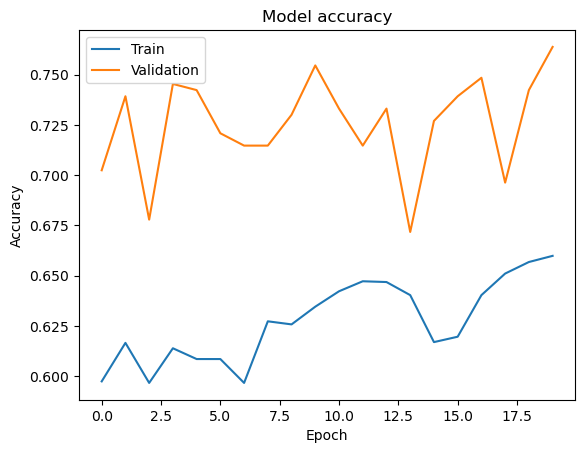

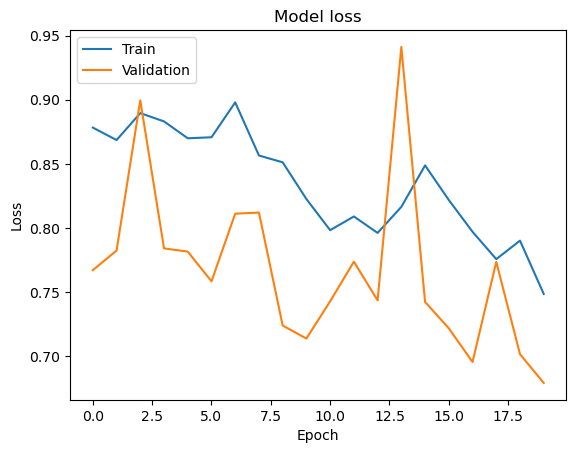

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [15]:
from sklearn.metrics import classification_report

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

predicted_probabilities = model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

predicted_labels = label_encoder.inverse_transform(predicted_classes)
true_labels = label_encoder.inverse_transform(np.argmax(y_test, axis=1))

report = classification_report(true_labels, predicted_labels)
print(report)


11/11 [==============================] - 5s 418ms/step - loss: 0.7508 - accuracy: 0.7309
Test Loss: 0.7508401870727539
Test Accuracy: 0.7308868765830994
11/11 [==============================] - 5s 391ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.71      0.77      0.74        98
meningioma_tumor       0.68      0.56      0.62        85
        no_tumor       0.68      0.62      0.65        58
 pituitary_tumor       0.82      0.93      0.87        86

        accuracy                           0.73       327
       macro avg       0.72      0.72      0.72       327
    weighted avg       0.72      0.73      0.73       327



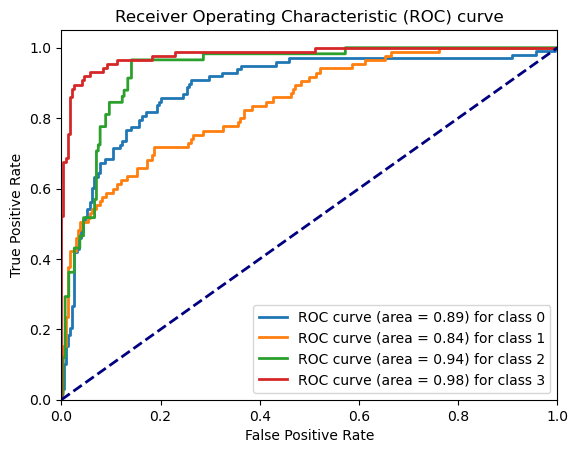

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

n_classes = len(np.unique(true_labels))
binarized_true_labels = label_binarize(true_labels, classes=np.unique(true_labels))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_true_labels[:, i], predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(binarized_true_labels.ravel(), predicted_probabilities.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


1/1 [==============================] - 0s 102ms/step


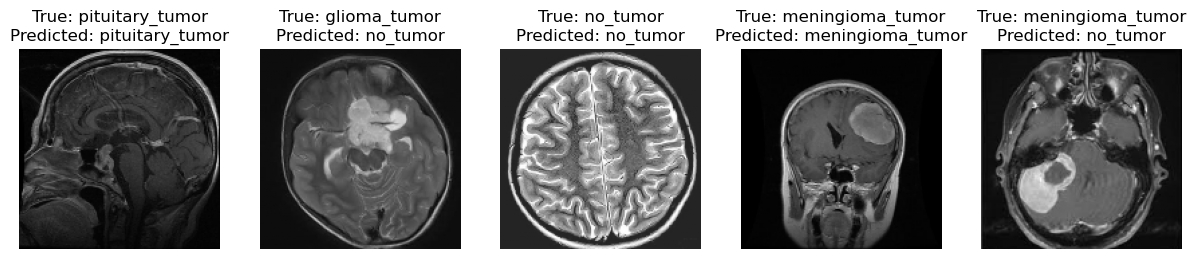

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.models import Model
import tensorflow as tf

sample_indices = np.random.choice(len(X_test), 5, replace=False)
sample_images = X_test[sample_indices]
sample_labels = true_labels[sample_indices]

sample_predicted_probabilities = model.predict(sample_images)
sample_predicted_labels = label_encoder.inverse_transform(np.argmax(sample_predicted_probabilities, axis=1))

plt.figure(figsize=(15, 10))
for i, (image, true_label, predicted_label) in enumerate(zip(sample_images, sample_labels, sample_predicted_labels)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')
plt.show()


11/11 [==============================] - 4s 375ms/step


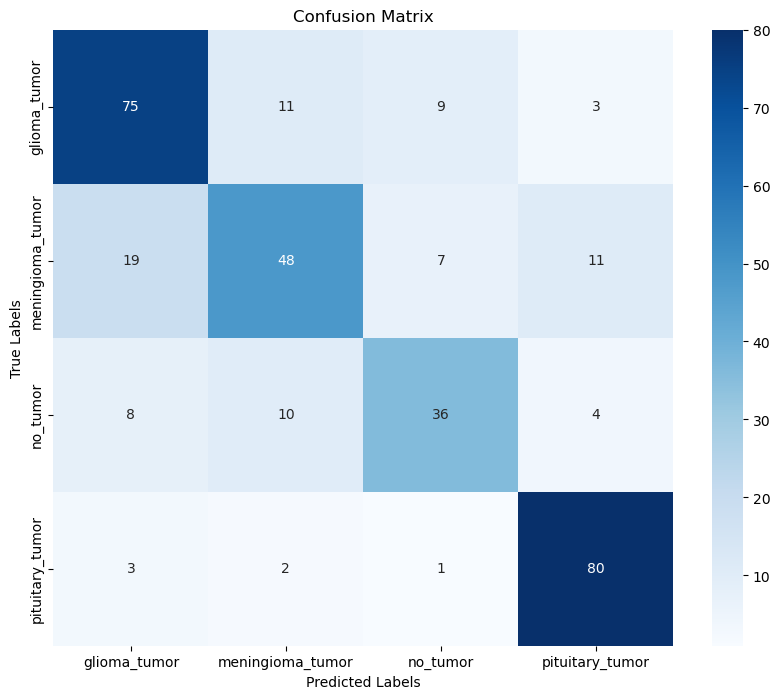

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

predicted_probabilities = model.predict(X_test)
class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
predicted_labels = np.argmax(predicted_probabilities, axis=1)

true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
